In [40]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_recall_fscore_support,ConfusionMatrixDisplay


In [41]:
df=pd.read_csv("C:/Users/Saurabh Kotkar/Desktop/iris.csv")


In [42]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,NaN,1.4,0.2,Setosa
2,4.7,NaN,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [43]:
df.isnull().sum()
df.head


<bound method NDFrame.head of      sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          NaN           1.4          0.2     Setosa
2             4.7          NaN           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]>

In [44]:
df['sepal.width']=df['sepal.width'].fillna(df['sepal.width']).mean()

df


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.048227,1.4,0.2,Setosa
1,4.9,3.048227,1.4,0.2,Setosa
2,4.7,3.048227,1.3,0.2,Setosa
3,4.6,3.048227,1.5,0.2,Setosa
4,5.0,3.048227,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.048227,5.2,2.3,Virginica
146,6.3,3.048227,5.0,1.9,Virginica
147,6.5,3.048227,5.2,2.0,Virginica
148,6.2,3.048227,5.4,2.3,Virginica


In [45]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [46]:
X=df.drop(['variety'],axis=1)



In [47]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.048227,1.4,0.2
1,4.9,3.048227,1.4,0.2
2,4.7,3.048227,1.3,0.2
3,4.6,3.048227,1.5,0.2
4,5.0,3.048227,1.4,0.2
...,...,...,...,...
145,6.7,3.048227,5.2,2.3
146,6.3,3.048227,5.0,1.9
147,6.5,3.048227,5.2,2.0
148,6.2,3.048227,5.4,2.3


In [48]:
y=df.drop([	'sepal.length'	,'sepal.width',	'petal.length'	,'petal.width'],axis=1)
y

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa
...,...
145,Virginica
146,Virginica
147,Virginica
148,Virginica


In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


In [50]:
gb=GaussianNB()
gb.fit(x_train,y_train)

y_predict=gb.predict(x_test)
gb.score(x_test,y_test)



C:\Users\Saurabh Kotkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9

In [51]:
cm=confusion_matrix(y_test,y_predict)
print("Accuracy score",accuracy_score(y_test,y_predict))


Accuracy score 0.9


In [52]:
cm
TN,FP,FN,TP,b,c,v,d,tr,=cm.ravel()
print("Tp",TP)
print("TN",TN)
print("FN",FN)
print("FP",FP)

Tp 0
TN 11
FN 0
FP 0


In [53]:
pfl=precision_recall_fscore_support(y_test,y_predict)# get four value
print(pfl[0])

[1.         0.88888889 0.8       ]


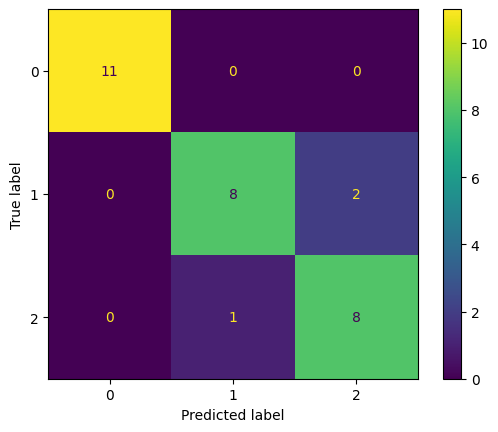

In [54]:
cmprint=ConfusionMatrixDisplay(confusion_matrix=cm)
cmprint.plot()
plt.show()